<a href="https://colab.research.google.com/github/kinkana77/analisis-sentimen-ulasan-weplay/blob/main/game_weplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#download library google-play-scraper
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00


**impor paket yang diperlukan**

In [ ]:
pip install pandas


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np


In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.wejoy.weplay',
    lang='id', #disini  scrape data ulasan aplikasi blibli yang berada di google play store
    country='id', #setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau diambil ada seribu
    filter_score_with=None # # kemudian di filter_score gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)


In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c763b091-5ec4-4a5b-bf88-6df2e9260e67,Laura Felcia,https://play-lh.googleusercontent.com/a/ACg8oc...,Gasuka banget main ini awal download dan liat ...,1,2,4.8.3,2024-11-24 23:55:22,Mohon maaf atas ketidaknyamannya. Akan segera ...,2024-11-25 03:17:08,4.8.3
1,470db1b0-2bdc-48da-871a-9148d8e12fa7,Twist,https://play-lh.googleusercontent.com/a-/ALV-U...,Min knpaaa gak ada bisa bukaa room? Jaringan t...,4,41,4.8.3,2024-11-23 00:43:02,"Hi, apabila berkenan bisa menginformasikan leb...",2024-11-25 08:12:12,4.8.3
2,85a16032-b9ab-40d9-8461-9d7799cc63d3,Amat Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,"game suka apa lgi ad weparty nya, sayang nya w...",3,0,4.8.3,2024-11-23 22:45:35,"Mohon maaf atas ketidaknyamannya, kami sangat ...",2024-11-25 03:56:45,4.8.3
3,cb45f58f-a4a6-4871-a40e-e379211fc462,farid faisal,https://play-lh.googleusercontent.com/a/ACg8oc...,Gw main game yg gabung2in buah hampir selesai ...,1,1,4.8.3,2024-11-24 02:49:38,"Mohon maaf atas kendala yang dialami, kami san...",2024-11-25 03:50:30,4.8.3
4,470802a9-c102-484f-b443-602b22330929,nurbaiti sitorus,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus sekali aku kalau bosen main ini masih ba...,5,36,4.8.3,2024-11-23 07:00:10,Terima kasih atas dukungan yang sudah anda ber...,2024-11-25 04:04:25,4.8.3


In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Laura Felcia,1,2024-11-24 23:55:22,Gasuka banget main ini awal download dan liat ...
1,Twist,4,2024-11-23 00:43:02,Min knpaaa gak ada bisa bukaa room? Jaringan t...
2,Amat Pratama,3,2024-11-23 22:45:35,"game suka apa lgi ad weparty nya, sayang nya w..."
3,farid faisal,1,2024-11-24 02:49:38,Gw main game yg gabung2in buah hampir selesai ...
4,nurbaiti sitorus,5,2024-11-23 07:00:10,Bagus sekali aku kalau bosen main ini masih ba...


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head(5)


,userName,score,at,content
5,Mia Wijayanti,5,2024-11-26 11:38:27,"Awal aju main biasa ajasih,tapi pas main game ..."
741,safa kamila,5,2024-11-26 10:07:30,Main nya seru dan mudah
823,Rival Dedi,5,2024-11-26 09:56:08,Bagus aku gapernah jadi spy nya game nya seru ...
276,Sultan Azra,5,2024-11-26 09:48:54,Gem nya bagus karena bisa berinteraksi dengan ...
806,Rahma R,5,2024-11-26 09:36:48,mantap banget game nya


In [ ]:
new_df.to_csv("scrapped_data_at.csv", index = False)  #kemudian save menjadi file csv

In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df


In [ ]:
my_df.to_csv("scrapped_data_at.csv", index = False)  #kemudian save menjadi file csv

In [ ]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score ma

In [ ]:
my_df.head(5)

,content,score
5,"Awal aju main biasa ajasih,tapi pas main game ...",5
741,Main nya seru dan mudah,5
823,Bagus aku gapernah jadi spy nya game nya seru ...,5
276,Gem nya bagus karena bisa berinteraksi dengan ...,5
806,mantap banget game nya,5


# pelabelan

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(1000)


,content,score,Label
5,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif
741,Main nya seru dan mudah,5,Positif
823,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif
276,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif
806,mantap banget game nya,5,Positif
...,...,...,...
792,"Seruu bangett, setiap hari kalau gak main game...",5,Positif
979,Susah banget sih maininnya Padahal saya udah b...,3,None
993,Min bagi gw gamenya bagus tapi banyak benar or...,4,Positif
570,"Aplikasinya bagus, hanya saja di permainan mic...",3,None


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(10)

,content,score,Label
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif
1,Main nya seru dan mudah,5,Positif
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif
4,mantap banget game nya,5,Positif
5,Game sangat seru tetapi harus pakai coin ketik...,3,NaN
6,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif
7,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif
8,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif
9,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif


In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    873 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,True
997,False,False,False
998,False,False,True


In [ ]:
my_df.isna().any()

,0
content,False
score,False
Label,True


In [ ]:
my_df.describe()

,score
count,1000.000000
mean,3.471000
std,1.608025
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

,0
content,0
score,0
Label,127


# 1. Handling Missing value-Ignore tuple

In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [ ]:
my_df.head(10)

,content,score,Label
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif
1,Main nya seru dan mudah,5,Positif
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif
4,mantap banget game nya,5,Positif
6,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif
7,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif
8,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif
9,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif
10,Nge-Lagnya terlalu parah... 1 aplikasi gamenya...,1,Negatif


In [ ]:
my_df.to_csv("weplaypreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/weplaypreprocessing.csv')
df.head(10)

,content,score,Label
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif
1,Main nya seru dan mudah,5,Positif
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif
4,mantap banget game nya,5,Positif
5,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif
6,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif
7,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif
8,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif
9,Nge-Lagnya terlalu parah... 1 aplikasi gamenya...,1,Negatif


# **Case Folding**
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df


In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif,awal aju main biasa ajasihtapi pas main game w...
1,Main nya seru dan mudah,5,Positif,main nya seru dan mudah
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif,bagus aku gapernah jadi spy nya game nya seru ...
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif,gem nya bagus karena bisa berinteraksi dengan ...
4,mantap banget game nya,5,Positif,mantap banget game nya
6,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif,nga bisa main habis uang harus beli lagi
7,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif,bagussssssssssssssssss bangetttttttttt dan bis...
8,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif,woi perbaiki mic nya error ga jelas aneh
9,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif,sangat seru dan menyenangkan cuma hatihati nan...
10,Nge-Lagnya terlalu parah... 1 aplikasi gamenya...,1,Negatif,ngelagnya terlalu parah aplikasi gamenya bany...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif,awal aju main biasa ajasihtapi pas main game w...,aju main ajasihtapi pas main game woos spy nya...
1,Main nya seru dan mudah,5,Positif,main nya seru dan mudah,main nya seru mudah
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif,bagus aku gapernah jadi spy nya game nya seru ...,bagus gapernah spy nya game nya seru centang y...
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif,gem nya bagus karena bisa berinteraksi dengan ...,gem nya bagus berinteraksi orang
4,mantap banget game nya,5,Positif,mantap banget game nya,mantap banget game nya
6,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif,nga bisa main habis uang harus beli lagi,nga main habis uang beli
7,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif,bagussssssssssssssssss bangetttttttttt dan bis...,bagussssssssssssssssss bangetttttttttt menghil...
8,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif,woi perbaiki mic nya error ga jelas aneh,woi perbaiki mic nya error ga aneh
9,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif,sangat seru dan menyenangkan cuma hatihati nan...,seru menyenangkan hatihati ketagihan lupa gara...
10,Nge-Lagnya terlalu parah... 1 aplikasi gamenya...,1,Negatif,ngelagnya terlalu parah aplikasi gamenya bany...,ngelagnya parah aplikasi gamenya bikin ngelag ...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif,awal aju main biasa ajasihtapi pas main game w...,aju main ajasihtapi pas main game woos spy nya...,"[aju, main, ajasihtapi, pas, main, game, woos,..."
1,Main nya seru dan mudah,5,Positif,main nya seru dan mudah,main nya seru mudah,"[main, nya, seru, mudah]"
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif,bagus aku gapernah jadi spy nya game nya seru ...,bagus gapernah spy nya game nya seru centang y...,"[bagus, gapernah, spy, nya, game, nya, seru, c..."
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif,gem nya bagus karena bisa berinteraksi dengan ...,gem nya bagus berinteraksi orang,"[gem, nya, bagus, berinteraksi, orang]"
4,mantap banget game nya,5,Positif,mantap banget game nya,mantap banget game nya,"[mantap, banget, game, nya]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

2793
------------------------
1 : aju : aju
2 : main : main
3 : ajasihtapi : ajasihtapi
4 : pas : pas
5 : game : game
6 : woos : woos
7 : spy : spy
8 : nya : nya
9 : rame : rame
10 : banget : banget
11 : berasa : asa
12 : pengalaman : alam
13 : gituh : gituh
14 : bagus : bagus
15 : latih : latih
16 : konsentrasi : konsentrasi
17 : pokok : pokok
18 : the : the
19 : best : best
20 : seru : seru
21 : mudah : mudah
22 : gapernah : gapernah
23 : centang : centang
24 : yaa : yaa
25 : makrasih : makrasih
26 : pembuat : buat
27 : weplay : weplay
28 : bikin : bikin
29 : gak : gak
30 : bosan : bosan
31 : dirumah : rumah
32 : makasiii : makasiii
33 : karna : karna
34 : ga : ga
35 : makasih : makasih
36 : gem : gem
37 : berinteraksi : interaksi
38 : orang : orang
39 : mantap : mantap
40 : nga : nga
41 : habis : habis
42 : uang : uang
43 : beli : beli
44 : bagussssssssssssssssss : bagussssssssssssssssss
45 : bangetttttttttt : bangetttttttttt
46 : menghilangkan : hilang
47 : stresss : stresss
48 : w

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"Awal aju main biasa ajasih,tapi pas main game ...",5,Positif,awal aju main biasa ajasihtapi pas main game w...,aju main ajasihtapi pas main game woos spy nya...,"[aju, main, ajasihtapi, pas, main, game, woos,...",aju main ajasihtapi pas main game woos spy nya...
1,Main nya seru dan mudah,5,Positif,main nya seru dan mudah,main nya seru mudah,"[main, nya, seru, mudah]",main nya seru mudah
2,Bagus aku gapernah jadi spy nya game nya seru ...,5,Positif,bagus aku gapernah jadi spy nya game nya seru ...,bagus gapernah spy nya game nya seru centang y...,"[bagus, gapernah, spy, nya, game, nya, seru, c...",bagus gapernah spy nya game nya seru centang y...
3,Gem nya bagus karena bisa berinteraksi dengan ...,5,Positif,gem nya bagus karena bisa berinteraksi dengan ...,gem nya bagus berinteraksi orang,"[gem, nya, bagus, berinteraksi, orang]",gem nya bagus interaksi orang
4,mantap banget game nya,5,Positif,mantap banget game nya,mantap banget game nya,"[mantap, banget, game, nya]",mantap banget game nya
6,Nga bisa main habis uang harus beli lagi😡😡😡😡,1,Negatif,nga bisa main habis uang harus beli lagi,nga main habis uang beli,"[nga, main, habis, uang, beli]",nga main habis uang beli
7,Bagussssssssssssssssss bangetttttttttt dan bis...,5,Positif,bagussssssssssssssssss bangetttttttttt dan bis...,bagussssssssssssssssss bangetttttttttt menghil...,"[bagussssssssssssssssss, bangetttttttttt, meng...",bagussssssssssssssssss bangetttttttttt hilang ...
8,"woi perbaiki mic nya, error ga jelas aneh",2,Negatif,woi perbaiki mic nya error ga jelas aneh,woi perbaiki mic nya error ga aneh,"[woi, perbaiki, mic, nya, error, ga, aneh]",woi baik mic nya error ga aneh
9,"sangat seru dan menyenangkan, cuma hati-hati, ...",5,Positif,sangat seru dan menyenangkan cuma hatihati nan...,seru menyenangkan hatihati ketagihan lupa gara...,"[seru, menyenangkan, hatihati, ketagihan, lupa...",seru senang hatihati tagih lupa garagara asi main
10,Nge-Lagnya terlalu parah... 1 aplikasi gamenya...,1,Negatif,ngelagnya terlalu parah aplikasi gamenya bany...,ngelagnya parah aplikasi gamenya bikin ngelag ...,"[ngelagnya, parah, aplikasi, gamenya, bikin, n...",ngelagnya parah aplikasi gamenya bikin ngelag ...


In [ ]:

data_clean.to_csv('hasil_TextPreProcessing_weplay.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv


In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

# spliting data

**10:90**

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.10 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.10,
                                                    random_state = 0)


**# pembobotan tf-idf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train1)
tfidf_test = tfidf_vectorizer.transform(X_test1)


In [ ]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(785,)
(785,)
(88,)
(88,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train1)

CountVectorizer()

In [ ]:
X_train1 = vectorizer.transform(X_train1)
X_test1 = vectorizer.transform(X_test1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train1, y_train1)

MultinomialNB()

In [ ]:

X_train1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test1)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test1, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train1, y_train1)
predicted = clf.predict(X_test1)

In [ ]:
print("MultinomialNB Accuracy:", accuracy_score(y_test1,predicted))
print("MultinomialNB Precision:", precision_score(y_test1,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test1,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test1,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test1, predicted)}')
print('====================================================\n')
print(classification_report(y_test1, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

#


MultinomialNB Accuracy: 0.8068181818181818
MultinomialNB Precision: 0.8333333333333334
MultinomialNB Recall: 0.6756756756756757
MultinomialNB f1_score: 0.746268656716418
confusion_matrix:
 [[25 12]
 [ 5 46]]

              precision    recall  f1-score   support

     Negatif       0.83      0.68      0.75        37
     Positif       0.79      0.90      0.84        51

    accuracy                           0.81        88
   macro avg       0.81      0.79      0.80        88
weighted avg       0.81      0.81      0.80        88



**memecah data test 20% dari keseluruhan data**

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)



pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train2 = tfidf_vectorizer.fit_transform(X_train2)
tfidf_test2 = tfidf_vectorizer.transform(X_test2)


In [ ]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(698,)
(698,)
(175,)
(175,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train2)


CountVectorizer()

In [ ]:
X_train2 = vectorizer.transform(X_train2)
X_test2 = vectorizer.transform(X_test2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_train2, y_train2)

MultinomialNB()

In [ ]:
X_train2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred2 = nb.predict(tfidf_test2)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train2, y_train2)
predicted = clf.predict(X_test2)

print("MultinomialNB Accuracy:", accuracy_score(y_test2,predicted))
print("MultinomialNB Precision:", precision_score(y_test2,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test2,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test2,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test2, predicted)}')
print('====================================================\n')
print(classification_report(y_test2, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

#

MultinomialNB Accuracy: 0.8171428571428572
MultinomialNB Precision: 0.8367346938775511
MultinomialNB Recall: 0.6307692307692307
MultinomialNB f1_score: 0.7192982456140351
confusion_matrix:
 [[ 41  24]
 [  8 102]]

              precision    recall  f1-score   support

     Negatif       0.84      0.63      0.72        65
     Positif       0.81      0.93      0.86       110

    accuracy                           0.82       175
   macro avg       0.82      0.78      0.79       175
weighted avg       0.82      0.82      0.81       175



**memecah data test 30% dari keseluruhan data*

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.30,
                                                    random_state = 0)


pembobotan tf-idf


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train3 = tfidf_vectorizer.fit_transform(X_train3)
tfidf_test3 = tfidf_vectorizer.transform(X_test3)

In [ ]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(611,)
(611,)
(262,)
(262,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train3)

CountVectorizer()

In [ ]:
X_train3 = vectorizer.transform(X_train3)
X_test3 = vectorizer.transform(X_test3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_train3, y_train3)

MultinomialNB()

In [ ]:
X_train3.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred3 = nb.predict(tfidf_test3)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test3, y_pred3)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train3, y_train3)
predicted = clf.predict(X_test3)

print("MultinomialNB Accuracy:", accuracy_score(y_test3,predicted))
print("MultinomialNB Precision:", precision_score(y_test3,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test3,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test3,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test3, predicted)}')
print('====================================================\n')
print(classification_report(y_test3, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

#


MultinomialNB Accuracy: 0.8435114503816794
MultinomialNB Precision: 0.7922077922077922
MultinomialNB Recall: 0.7093023255813954
MultinomialNB f1_score: 0.7484662576687117
confusion_matrix:
 [[ 61  25]
 [ 16 160]]

              precision    recall  f1-score   support

     Negatif       0.79      0.71      0.75        86
     Positif       0.86      0.91      0.89       176

    accuracy                           0.84       262
   macro avg       0.83      0.81      0.82       262
weighted avg       0.84      0.84      0.84       262



40:60

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.40 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.40,
                                                    random_state = 0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train4 = tfidf_vectorizer.fit_transform(X_train4)
tfidf_test4 = tfidf_vectorizer.transform(X_test4)


In [ ]:
print(X_train4.shape)
print(y_train4.shape)
print(X_test4.shape)
print(y_test4.shape)

(523,)
(523,)
(350,)
(350,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train4)



CountVectorizer()

In [ ]:
X_train4 = vectorizer.transform(X_train4)
X_test4 = vectorizer.transform(X_test4)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train4, y_train4)

MultinomialNB()

In [ ]:
X_train4.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred4 = nb.predict(tfidf_test4)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test4, y_pred4)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train4, y_train4)
predicted = clf.predict(X_test4)

print("MultinomialNB Accuracy:", accuracy_score(y_test4,predicted))
print("MultinomialNB Precision:", precision_score(y_test4,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test4,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test4,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test4, predicted)}')
print('====================================================\n')
print(classification_report(y_test4, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

#


MultinomialNB Accuracy: 0.8314285714285714
MultinomialNB Precision: 0.78125
MultinomialNB Recall: 0.6637168141592921
MultinomialNB f1_score: 0.7177033492822966
confusion_matrix:
 [[ 75  38]
 [ 21 216]]

              precision    recall  f1-score   support

     Negatif       0.78      0.66      0.72       113
     Positif       0.85      0.91      0.88       237

    accuracy                           0.83       350
   macro avg       0.82      0.79      0.80       350
weighted avg       0.83      0.83      0.83       350



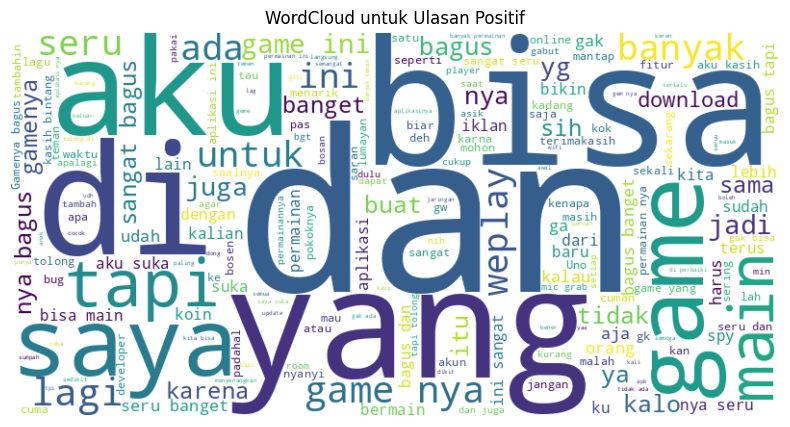

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

# Filter data untuk sentimen positif
positive_reviews = data_clean[data_clean['Label'] == 'Positif']

# Gabungkan semua ulasan positif menjadi satu string
positive_text = ' '.join(positive_reviews['content'])

# Buat word cloud dari teks ulasan positif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Matikan axis
plt.title("WordCloud untuk Ulasan Positif")
plt.show()


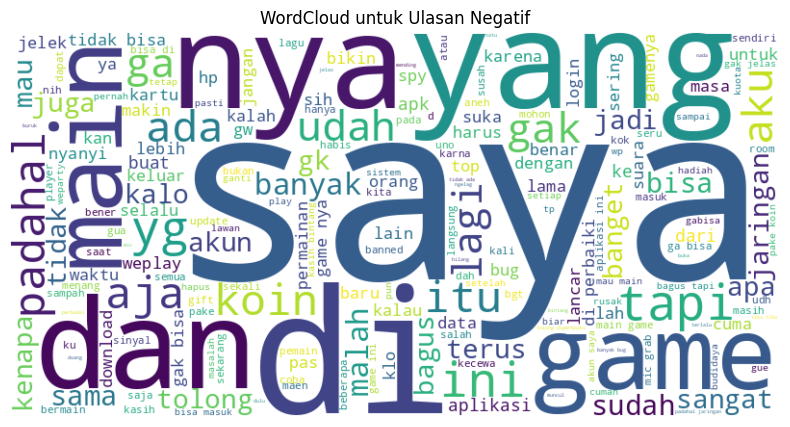

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

# Filter data untuk sentimen negatif
negative_reviews = data_clean[data_clean['Label'] == 'Negatif']

# Gabungkan semua ulasan negatif menjadi satu string
negative_text = ' '.join(negative_reviews['content'])

# Buat word cloud dari teks ulasan negatif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Matikan axis
plt.title("WordCloud untuk Ulasan Negatif")
plt.show()


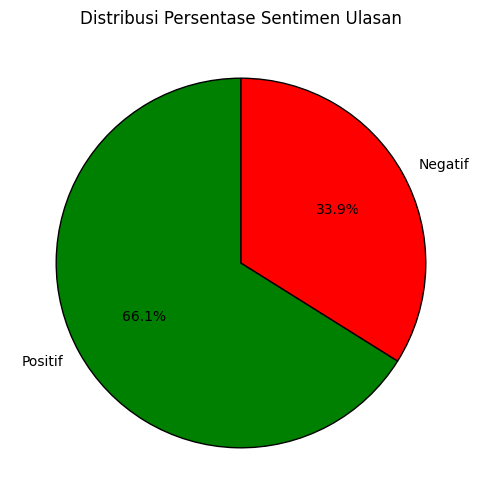

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

# Hitung jumlah ulasan Positif dan Negatif
sentiment_counts = data_clean['Label'].value_counts()

# Plot Pie Chart untuk Persentase Sentimen
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Persentase Sentimen Ulasan')
plt.ylabel('')  # Hilangkan label y yang tidak perlu
plt.show()


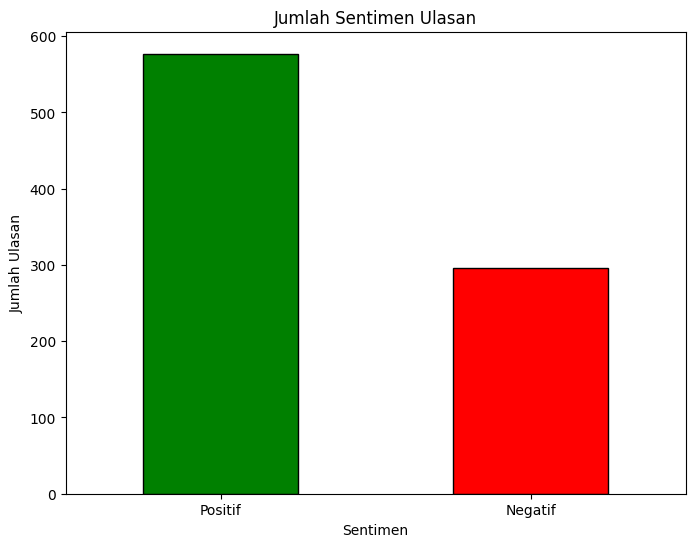

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_weplay.csv')

# Hitung jumlah ulasan Positif dan Negatif
sentiment_counts = data_clean['Label'].value_counts()

# Plot Bar Chart untuk Jumlah Sentimen
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Jumlah Sentimen Ulasan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)  # Menjaga label X agar tetap horizontal
plt.show()
